


# Encontrando números primos

Encontrar numeros primos siempre ha representado un reto, pues aunque su definición parezca trivial, entre más grande sea un número $n$ mayor es el número de interaciones necesarias para poder comprobar si este número es o no un número primo. Primero recordamos que un número primo es un numero $n\in \mathbb{N} $ tál que $ \forall\  a \in \mathbb{N},\ a\in (1,n)$, $n/a \not\in \mathbb{N}$

Una forma trivial de atacar este problema es por inspección, para esto hacemos una función que pruebe pueda comprobar si un numero dado $n$ es primo o no.

In [1]:
import numpy as np
import math
import time
import matplotlib.pylab as plt
from collections import Counter
import pylab


In [2]:
def basic_is_prime(n):
    result=True
    for i in range(2,n):
        if n%i==0:
            result = False
    return result

Esta función recibe un numero entero $n$ y revisa todos los números hasta $n-1$ buscando los posibles divisores de $n$ en el caso en el que ningún número divida a $n$ entre $2$ y $n-1$, se concluye entonces que $n$ es primo y por ende la función `basic_is_prime`retorna `True`.
Ahora vamos a usar esta función para encontrar los primeros números primos entre $0$ y $10000$.

In [9]:
start=time.time()
lista_basic_prime=[]
for i in range(2,10000):
    if basic_is_prime(i):
        lista_basic_prime.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 4.35509991645813


Como se ve, esto es un algoritmo lento, si se quisiera determinar si un número grande es o no un número primo esto podría tardar demasiado, con lo cual nos lleva a considerar un algoritmo distinto para poder determinar si algún numero es primo o no.

## Algoritmo mejorado

suponga que $m=\sqrt{n}$, entonces $m\times m = n$. Ahora si $n$ no es un número primo entonces $n$ puede ser escrito como $a\times b \Rightarrow \ m\times m=a\times b$. Observemos que si $m$ es un numero real, mientras que n,a y b son numeros naturales.

Ahora tenemos 3 posibles casos:
1. $a>m \Rightarrow b<m$
2. $a=m \Rightarrow b=m$
3. $a<m \Rightarrow b>m$

Para todos estos 3 casos, se tiene que $\min (a,b)\leq m$. Por ende $m$ será una cota para encontrar al menos un factor de $n$, lo cual resulta ser una condición suficiente para mostrar que $n$ no es primo.

In [4]:
def new_is_prime(n):
    result=True
    for i in range(2,int(np.sqrt(n)+1)):
        if n%i==0:
            result = False
    return result

In [6]:
start=time.time()
lista_new_prime=[]
for i in range(2,10000):
    if new_is_prime(i):
        lista_new_prime.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 0.054857730865478516


Como se puede ver esto es un mejora significativa en el programa, sin embargo esto podría ser mejorado ligeramente más. Para esto se hace uso del hecho de que ningun número par puede ser un número primo, con lo cual la busqueda de puede hacerce de en los impares.

In [19]:
def list_of_primes(n):
    lista=np.array([2])
    start=time.time()
    for i in range(10000,n+1,2):
        if new_is_prime(i):
            lista=np.append(lista,i)
            
    return lista

In [8]:
start=time.time()
lista_new_prime_2=list_of_primes(10000)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 0.0388638973236084


Con el fin de observar que si se guardó la misma cantidad de números primos podemos preguntar por las longitudes de las listas

In [14]:
len(lista_basic_prime),len(lista_new_prime),len(lista_new_prime_2)

(1229, 1229, 1229)

## Ejercicio 1
Efectue un algoritmo que compruebe que cada elemento de las tres listas es el mismo

In [16]:
i=0
bol=True
while(bol and i<len(lista_basic_prime)):
      if((lista_basic_prime[i]+lista_new_prime[i])/lista_new_prime_2[i]==2):
            i+=1
      
      else:
            bol=not bol


print(bol)







True


## Ejercicio 2
Una de las aplicaciones que tiene el encontrar los numeros primos es la descomposición de un número en factores primos.

Haga una función que haga lo siguente:

Dado $n\in \mathbb{N}$ encuentre la descomposición en factores primos de $n$. el resultado debe estar dado como una cadena escrita de la forma:

$"(p1**n1)(p2**n2)...(pk**nk)"$

con $p(i)$ está ordenado de menor a mayor y $n(i)$ es vacio si $n(i)$ es 1.

Ejemplo: n= 86240, la función retorna $"(2** 5)(5)(7** 2)(11)"$

Use la anterior función para calcular la descomposición en numeros primos de $512345021, 777546031$ y $7775460$ y evalue cuanto tiempo le toma a su algoritmo efectuar tal descomposición

In [17]:
##Codigo que nos enviaron, no hay que hacerlo

# Metodos aleatorios para encontrar números primos

## Test de Fermat
Este es un test de complejidad $\mathbb{O}(\log(n)$ para comprobar si un número es primo o no. Este test está basado en _Fermat's Little Theorem_

**Fermat's Little Theorem**: si $n$ es un numero primo y $a$ es cualquier entero positivo menor que $n$, entonces $a^{n}$ es congruente a $a$ modulo $n$

Entonces si $n$ no es un numero primo, entonces en general para casi cualquier $a<n$ no se satisface el aterior teorema.

Este test difiere de la mayoria de los algoritmos convencionales, en la cual la respuesta del algoritmo garantiza que esta solución está correcta. Acá lo único que se puede decir de la respuesta proporcionada es que es probablemente correcta. De forma más precisa, si $n$ nunca falla el test de Fermat, se puede estar seguro de que $n$ es un número primo. Sin embargo, el hecho de que $n$ pase el test o no, no garantiza que $n$ sea primo o no, sólo se tiene un indicador de que muy probablemente lo sea. En resumen si este test se aplica una cantidad suficiente de veces y se tiene que $n$ siempre pasa el test, entonces la probabilidad de error al momento de decidir si este número es primo, se reduce tanto como se desee. 


El problema de este test aparece cuando se tiene que hacer la operación $a^{n}\ ({\mbox{mod}}\ n)$, pues si se hace de una forma "naïve" se tiene que la potencia $a^{n}$ crece muy rapido y esto hace que la la maquina no lo pueda escribir.
Para esto es entonce necesario hacer uso de otro tipo exponenciación, llamado "Exponenciación modular", este tipo de exponenciación resulta ser bastante útil en criptografia y esta aplicación resulta importante al tratar con números "Grandes".

[Link de referencias](https://en.wikipedia.org/wiki/Modular_exponentiation)

__Sugerencia__: La función pow de ``Python`` puede ser usada, para esto vea la referencia de esta funciòn.

Para implementar el Test de Fermat primero se se escoge un numero aleatorio $a$ entre $1$ y $n-1$ y se verifica si el residuo de modulo $n$ de $a^{n}$ es igual a $a$.

In [5]:
def Fermat_Test(n,k):
    Test=True
    for i in range(k):
        a=np.random.randint(2,n)
        exp=pow(a,n,n)
        if exp != a:
            Test=False
            break
    return Test

In [25]:
start=time.time()
nueva_lista=[2]
for i in range(3,12000):
    if Fermat_Test(i,10):
        nueva_lista.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 0.07782125473022461


Lo que se tiene acá es que aparentemente se está tomando más tiempo con este algoritmo que con el el propuesto anteriormente, no obstante, esto no es debido a que la cantidad de numero que está calculando no es exactamente la misma cantidad de números primos que hallamos anteriormente, esto se puede ver preguntando por la longitud de cada lista.

In [23]:
len(nueva_lista),len(list_of_primes(10000))

(1446, 1229)

## Ejercicio 3
Con el fin de ver cuales fueron los nuevos números que aparecieron a partir de este algoritmo, haga una función que determine cuales son los números nuevos que aparecen. Estos números que aparecen son conocidos por el nombre de [Números de Carmichael](https://en.wikipedia.org/wiki/Carmichael_number), encuentre los primeros $12$ números y use la función del Ejercicio 2 para calcular la descomposición de estos números y así mostrar que estos no son números primos.

Devido al problema que se tiene con el test de Fermat que existen números que logran pasar este test desapercibidos y que no son primos, pues resultaba que $a^{n}$ era congruente con $a$ modulo n para cualquier entero $a<n$. Aunque estos números fueran bastante extraños, se tiene entonces que el test de Fermat parecia no ser un buen test para evaluar si un número era o no primo, con lo cual es necesario recurrir a algún metodo un poco más elaborado para esto.

In [30]:
def numCarmichael():
    i=0
    j=0
    x=nueva_lista
    y=list_of_primes(10000)
    resp=[]
    while(i<len(y) or j<12):
        if(x[i] not in y):
            resp.append(x[i])
            j+=1
        i+=1
    return resp
        
            
    
    




In [31]:
print(numCarmichael())

[561, 1105, 1729, 2465, 2821, 6601, 8911, 10007, 10009, 10037, 10039, 10061]


# Miller-Rabin Test
Este se deriva de una variante del teorema de Fermat. Para hacer uso de este test en un número $n$ se seleciona de forma aleatoria un número $a<n$ y este se eleva a la $n-1$ y se toma el modulo $n$, salvo que en el momento en el que se calcula esto por medio de la operación de la Exponenciación modular, se verifica si se ha descubierto una "Raiz cuadrada no trivieal de $1$ modulo $n$", esto es, un número que no sea igual a $1$ o $-1$ cuyo cuadrado es igual a 1 modulo $n$. Es posible demostrar que si tal raiz cuadrada no trivial de $1$ existe, entonces $n$ no es un número primo. Así mismo es posible demostrar que si $n$ es un numero impar que no es primo, entonces, para al menos la mitad de los números $a<n$, al calcular $a^{n-1}$ haciendo uso de la exponenciación modular, se puede determinar si el número es o no una raiz cuadrada no trivial de $1$ modulo $n$. Esta es la razón principal por la cual al hacer uso de este test, se tiene una certeza de si los resultados que se obtienen son los adecuados o no.

Para esto hacemos lo siguiente, supongamos que $n>1$ es un númere impar del cual queremos saber si es primo o no. Sean $s$ el número natural y $d$ el impar tales que $n-1 = 2^{s}d$ y $a$ un entero escogido aleatoriamente entre $2$ y $n-2$ 

__Paso 0__: Se calcula $x_{0} = a^{d}\ (mod\ n).$

Si ${\displaystyle x_{0}\equiv \pm 1\ (mod\ n)}$ , el test culmina con la conlcusión de que $n$ es probable primo.

__Paso 1__: En caso contrario se calcula ${\displaystyle x_{1}=x_{0}^{2}\ (mod\ n)}$.

Si ${\displaystyle x_{1}\equiv -1\ (mod\ n)} $, el test culmina con la conclusión de que n es probable primo.

__Paso $i$__: De igual forma, siempre que ${\displaystyle i<s-1}$ y ${\displaystyle x_{i-1}\neq \pm 1\ (mod\ n)}$, se calcula ${\displaystyle b_{i}=b_{i-1}^{2}\ (mod\ n)}$.

Si ${\displaystyle b_{i}\equiv -1\ (mod\ n)}$, el test culmina con la conclusión de que n es probable primo.


__Paso s-1__ Se calcula ${\displaystyle b_{k-1}=b_{k-2}^{2}\ (mod\ n)}$.

Si ${\displaystyle b_{k-1}\equiv -1\ (mod\ n)}$ , el test culmina con la conclusión de que n es probable primo.


En cualquier otro caso, el test culmina con la conclusión de que n no es primo.

In [6]:
def check(a,s ,d, n):
    x=pow(a,d,n)
    #print("%d ---- %d" %(a,x))
    if x==1:
        return True
    for i in range(s-1):
        if x==n-1:
            return True
        x=pow(x,2,n)
        #print("%d ---- %d" %(a,x))
    return x==n-1
def miller_rabin(n,k):
    # 2  es un número primo
    if n==2:
        return True
    '''todo numero par no es un número primo, (menos el 2)
    entonces la forma más rapida de verificar esto es viendo si 
    el ultimo elemento del número en binario es termina en 1 ( es impar)'''
    if not n & 1:
        return False
    s=0
    d=n-1
    #Esta parte se hace para determinar cuales son los valores de s y de d para así escribir n-1 como 2^{s}d
    while(d%2 == 0):
        #dividimos por 2
        d>>=1 # Esto es equivalente a divir por 2, el correr un 
        s+=1
    for i in range(k):
        a=np.random.randint(2,n)-1
        if not check(a,s,d,n):
            return False
    return True

In [15]:
start=time.time()
lista_miller_rabin=[2,3]
for i in range(4,10000):
    if miller_rabin(i,10):
        lista_miller_rabin.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 0.14474248886108398


Aunque el tiempo tomado se redujo significativamente se observa que de igual forma los teste snteriores parecen funcionar mejor, sin embargo la ventaja de este test aparece cuando se quiere verificar si números muy grandes son primos o no, para esto probemos con un números tales como los que se encuentran en el archivo `Primos_1E11.txt`, los cuales són números primos bastante grandes.

In [16]:
archivo_primos=open("Primos_1E11.txt","r")
numeros_primos_lista=np.array([],dtype=int)
for i in archivo_primos.readlines():
    numeros=i.split()
    numeros=np.array(numeros,dtype=int)
    numeros_primos_lista=np.append(numeros_primos_lista,numeros)
archivo_primos.close()

In [17]:
start=time.time()
for i in numeros_primos_lista:
    new_is_prime(i)
end=time.time()
print("Tiempo tomado metodo convencional:",end-start)

Tiempo tomado metodo convencional: 33.99022197723389


In [18]:
start=time.time()
for i in numeros_primos_lista:
    #print(i,type(i))
    miller_rabin(int(i),50)
end=time.time()
print("Tiempo tomado metodo Miller Rabin:",end-start)

Tiempo tomado metodo Miller Rabin: 0.1726694107055664


Con esto se puede evidenciar lo potente del método de Miller-Rabin comparado con los metodos convencionales.

# Ejercicio 4

Con el fin de estudiar el desempeño de cada uno de los algoritmos que se habló acá, efectue un algoritmo que compare los tiempos que toma cada método para los números primos que estén entre $1\times 10^{4}$ y $1\times 10^{6}$, para mostrar los resultados prepare una gráfica en donde se muestren los tiempos tomados por cada algoritmo en función del valor del número primo en este rango.

In [26]:
start=time.time()
lista_new_prime=[]
time1=[]
for i in range(10001,1000000,2):
    if new_is_prime(i):
        lista_new_prime.append(i)
        time1.append(time.time()-start)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 16.37023615837097


In [37]:
start=time.time()
nueva_lista=[]
time2=[]
for i in range(10000,1000000):
    if Fermat_Test(i,10):
        nueva_lista.append(i)
        time2.append(time.time()-start)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 6.271264314651489


In [38]:
start=time.time()
lista_miller_rabin=[]
time3=[]
for i in range(10000,1000000):
    if miller_rabin(i,10):
        lista_miller_rabin.append(i)
        time3.append(time.time()-start)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 5.642911672592163


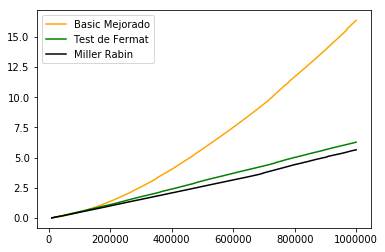

In [43]:
pylab.plot(lista_new_prime,time1,c='orange',label='Basic Mejorado')
pylab.plot(nueva_lista,time2,c='green',label='Test de Fermat')
pylab.plot(lista_miller_rabin,time3,"black",label='Miller Rabin')
pylab.legend(loc='upper left') 
pylab.show()
